In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop



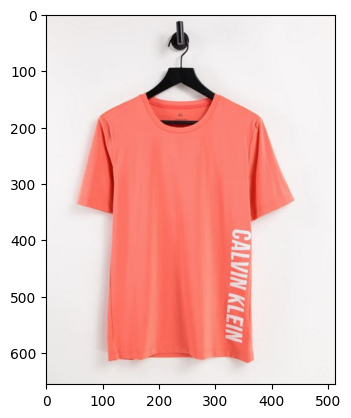

In [27]:
img=image.load_img(r"D:\GithubWindows\zz\training\t-shirt\8.jpg")
plt.imshow(img)

In [28]:
cv2.imread(r"D:\GithubWindows\zz\training\t-shirt\8.jpg")

array([[[234, 235, 239],
        [234, 235, 239],
        [234, 235, 239],
        ...,
        [242, 243, 247],
        [242, 243, 247],
        [241, 241, 247]],

       [[234, 235, 239],
        [234, 235, 239],
        [234, 235, 239],
        ...,
        [242, 243, 247],
        [242, 243, 247],
        [242, 242, 248]],

       [[234, 235, 239],
        [234, 235, 239],
        [234, 235, 239],
        ...,
        [242, 243, 247],
        [242, 243, 247],
        [243, 243, 249]],

       ...,

       [[227, 229, 230],
        [227, 229, 230],
        [227, 229, 230],
        ...,
        [241, 243, 244],
        [241, 243, 244],
        [241, 243, 244]],

       [[227, 229, 230],
        [227, 229, 230],
        [227, 229, 230],
        ...,
        [241, 243, 244],
        [241, 243, 244],
        [241, 243, 244]],

       [[226, 228, 229],
        [226, 228, 229],
        [226, 228, 229],
        ...,
        [241, 243, 244],
        [241, 243, 244],
        [241, 243, 244]]

In [29]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
testing=ImageDataGenerator(rescale=1/255)

In [30]:
train_dataset=train.flow_from_directory(r'D:\GithubWindows\zz\testing',
                                        target_size=(300,300),
                                        batch_size=16,
                                        class_mode='sparse')
validation_dataset=validation.flow_from_directory(r'D:\GithubWindows\zz\validation',
                                             target_size=(300,300),
                                             batch_size=16,
                                             class_mode='sparse')
# test_dataset=testing.flow_from_directory(r'D:\GithubWindows\zz\testing',
#                                              target_size=(200,200),
#                                              batch_size=16,
#                                              class_mode='sparse')

Found 1602 images belonging to 3 classes.


Found 333 images belonging to 3 classes.


In [75]:
test_dataset=testing.flow_from_directory(r"D:\GithubWindows\zz\test",
                                             target_size=(300,300),
                                             batch_size=2,
                                             class_mode='sparse')

Found 0 images belonging to 0 classes.


In [31]:
train_dataset.class_indices

{'sho': 0, 't-shirt': 1, 'tro': 2}

In [32]:
train_dataset.classes

array([0, 0, 0, ..., 2, 2, 2])

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),


    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(96, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [34]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])


In [35]:
model.fit(train_dataset,
          epochs=50,
          batch_size=60,
          validation_data=validation_dataset)


Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 95s 887ms/step - accuracy: 0.6243 - loss: 2.3320 - val_accuracy: 0.9880 - val_loss: 0.1098
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 66s 630ms/step - accuracy: 0.9484 - loss: 0.1811 - val_accuracy: 0.9940 - val_loss: 0.0433
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 64s 614ms/step - accuracy: 0.9742 - loss: 0.1056 - val_accuracy: 0.9760 - val_loss: 0.0602
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 64s 608ms/step - accuracy: 0.9770 - loss: 0.0755 - val_accuracy: 0.9580 - val_loss: 0.1006
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 70s 675ms/step - accuracy: 0.9908 - loss: 0.0468 - val_accuracy: 0.9970 - val_loss: 0.0076
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 80s 771ms/step - accuracy: 0.9923 - loss: 0.0434 - val_accuracy: 1.0000 - val_loss: 1.9869e-04
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 73s 698ms/step - accuracy: 0.9862 - loss: 0.0759 - val_accuracy: 0.9970 - val_loss: 0.0212
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 63s 608ms/step - accuracy: 0.9984 - los

In [46]:
model.save('my_model5.h5')


In [66]:
from keras.models import load_model
loaded_model = load_model('FFmy_model.h5')


In [67]:
predicted_classes = np.argmax(model.predict(validation_dataset), axis=-1)
print(predicted_classes)

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 299ms/step
[0 0 0 0 0 0 1 1 2 0 2 1 2 1 0 0 0 0 0 2 0 0 2 1 2 0 0 1 0 1 1 0 1 1 1 1 1
 0 2 1 0 0 1 0 1 0 0 0 2 1 1 1 1 0 0 1 0 1 2 0 0 0 1 0 0 0 0 0 0 0 1 2 0 1
 0 2 1 0 2 1 1 2 1 0 1 0 2 0 1 1 2 1 1 0 0 0 1 0 1 2 0 1 1 0 2 1 0 0 0 0 1
 1 1 1 0 0 1 1 1 2 1 0 0 0 0 1 2 0 2 1 2 0 0 0 0 1 2 0 1 1 0 0 2 0 0 2 0 0
 2 1 0 1 1 0 2 1 2 1 0 1 2 1 0 1 2 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 2 1 1 0 1
 1 0 1 1 0 1 1 1 1 1 2 0 2 2 0 0 1 1 1 1 0 2 1 1 1 2 0 1 0 1 0 2 1 2 2 1 1
 0 1 1 1 1 1 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 2 1 1 0 1 1 0 1 0 1 0 1 1 1
 0 0 0 2 0 1 2 0 1 0 2 0 2 2 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 2 1 1 1
 1 0 1 0 1 0 0 2 1 1 1 1 2 0 0 1 0 0 1 0 2 0 1 1 1 0 1 0 1 1 1 1 0 0 0 2 0]


In [72]:
#evaluation = model.evaluate(train_dataset,train_dataset.classes)
# Evaluate the model on the validation dataset
val_loss, val_acc = model.evaluate(validation_dataset)
print('Validation accuracy:', val_acc)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 290ms/step - accuracy: 1.0000 - loss: 4.5371e-04
Validation accuracy: 1.0


In [71]:
# history = model.fit(
#     train_dataset,
#     epochs=10,
#     validation_data=validation_dataset
# )

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(validation_dataset)
# print('Test accuracy:', test_acc)

Epoch 1/10
 18/101 ━━━━━━━━━━━━━━━━━━━━ 44s 534ms/step - accuracy: 1.0000 - loss: 1.1033e-08

KeyboardInterrupt: 

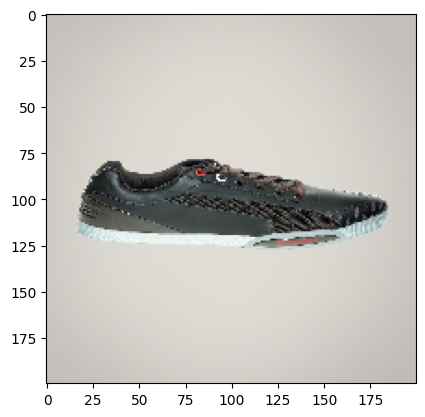

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
sho


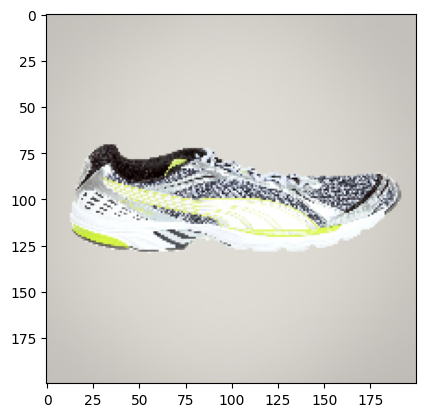

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
sho


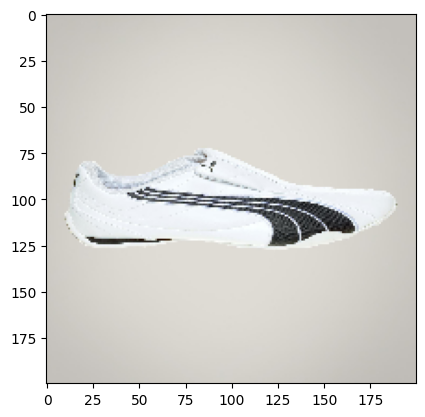

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
sho


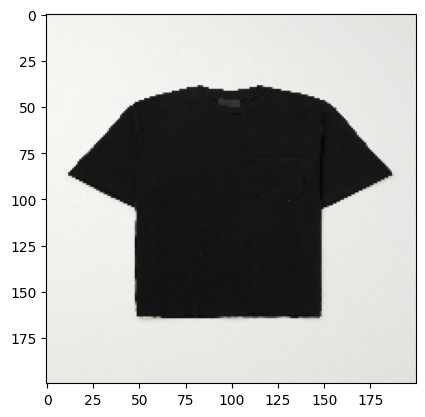

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
t-shirt


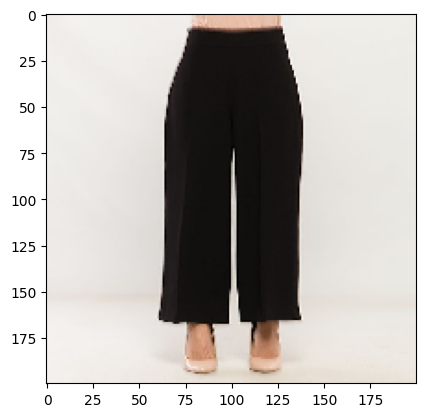

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
trouser


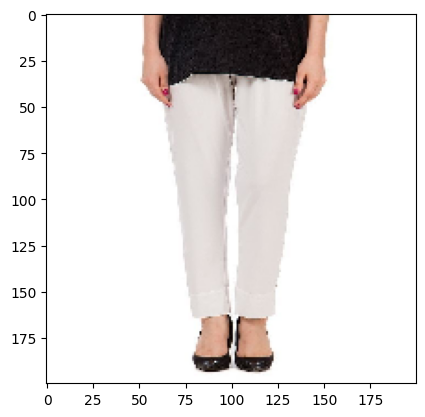

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
trouser


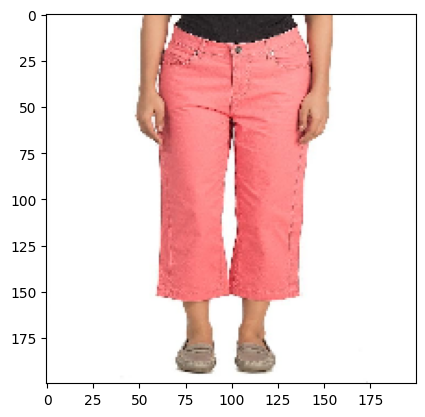

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
trouser


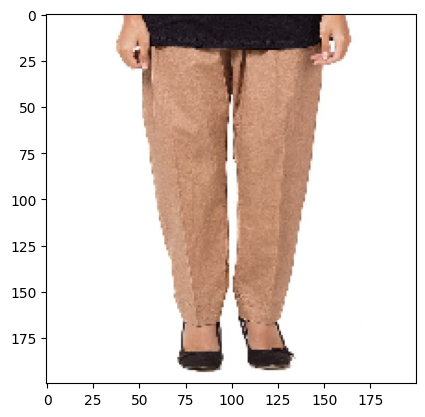

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
trouser


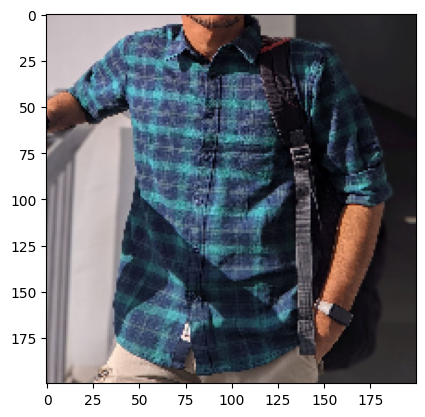

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
t-shirt


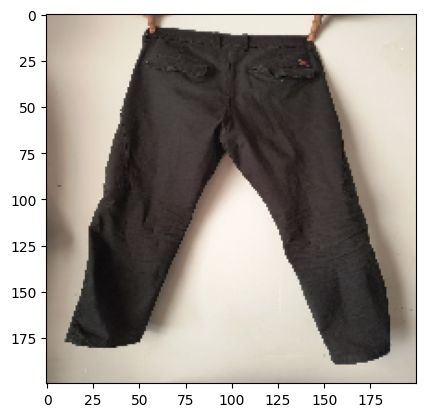

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
t-shirt


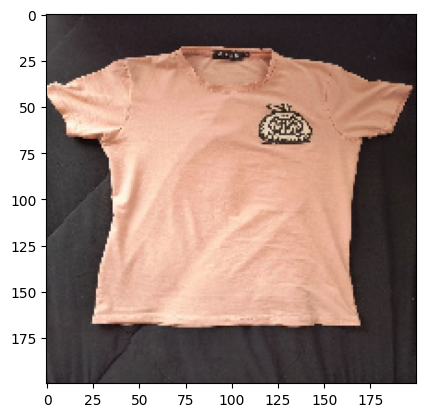

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
t-shirt


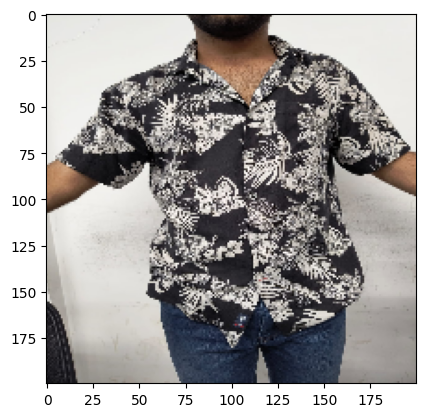

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
t-shirt


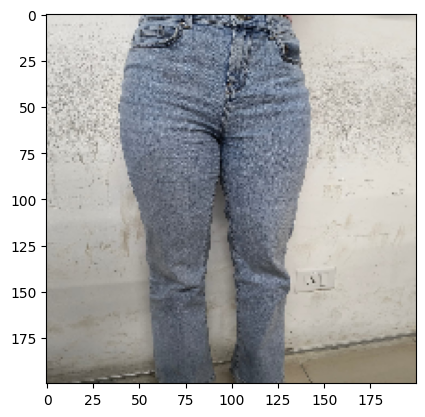

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
trouser


In [69]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

dir_path = r"D:\GithubWindows\zz\test"

# Assuming you have loaded your model somewhere in your code before this loop
# loaded_model = ...

for filename in os.listdir(dir_path):
    img_path = os.path.join(dir_path, filename)
    img = image.load_img(img_path, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    result = loaded_model.predict(X)
    prediction = np.argmax(result) 
    
    if prediction == 0:
        print("sho")
    elif prediction == 1:
        print('t-shirt')
    else:
        print('trouser')
